# Summary

Models tested: RandomForestClassifier (RFC), LogisticRegressor (LR), Ensemble model with RFC and LR
For this problem I first did a check for any missing values. I did a test train split with 0.3, converted text to vectors using CountVectorizer.
I then trained RandomFrest model by first only specifying a random number of n_estimators. The model perfromed well but doean't generalize well to the test set. I use RandomizedSearch of hyperparameter optimization, improving the perfromance slightly.
I try LogisticRegressor to see if it performs any better. It does, especially when introducing L2 regulrization term.

Things I would try if I had more time: dimentionality reduction - PCA or forward-feature selection, different tokenization method (Word2Vec, BertTokenizer)

# Data exploration and transformation

In [5]:
# import data to pandas dataframe
import pandas as pd

file_path = '../data/twitter_dataset_small_w_bart_preds.csv'
df = pd.read_csv(file_path)
df.head(10)


,is_positive,id,datetime,user,message,bart_is_positive
0,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...,0.005163
1,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,Young_J,I'm off too bed. I gotta wake up hella early t...,0.339430
2,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,dougnawoschik,I havent been able to listen to it yet My spe...,0.065703
3,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,thireven,now remembers why solving a relatively big equ...,0.004046
4,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,taracollins086,"Ate too much, feel sick",0.000581
5,0,2052381070,Sat Jun 06 00:32:23 PDT 2009,Portablemonkey,Tried to purchase a parked domain through GoDa...,0.001116
6,1,1983449090,Sun May 31 13:10:36 PDT 2009,jessig06,on lunch....dj should come eat with me,0.657557
7,0,2245480599,Fri Jun 19 16:11:34 PDT 2009,Aligrl,Just got back from VA Tech Equine Medical Cent...,0.017802
8,0,1770706008,Mon May 11 22:01:35 PDT 2009,leyyyy,can't log in to my other twitter account. supe...,0.001638
9,1,2050057894,Fri Jun 05 17:59:34 PDT 2009,AmiAhuja,@TamaraSchilling Adventure - That's what we al...,0.897199


array([[<Axes: title={'center': 'is_positive'}>,
        <Axes: title={'center': 'id'}>],
       [<Axes: title={'center': 'bart_is_positive'}>, <Axes: >]],
      dtype=object)

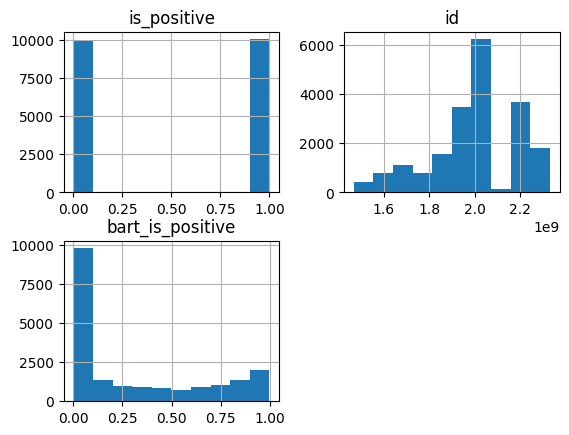

In [6]:
# check numerical column distributions
df.hist()

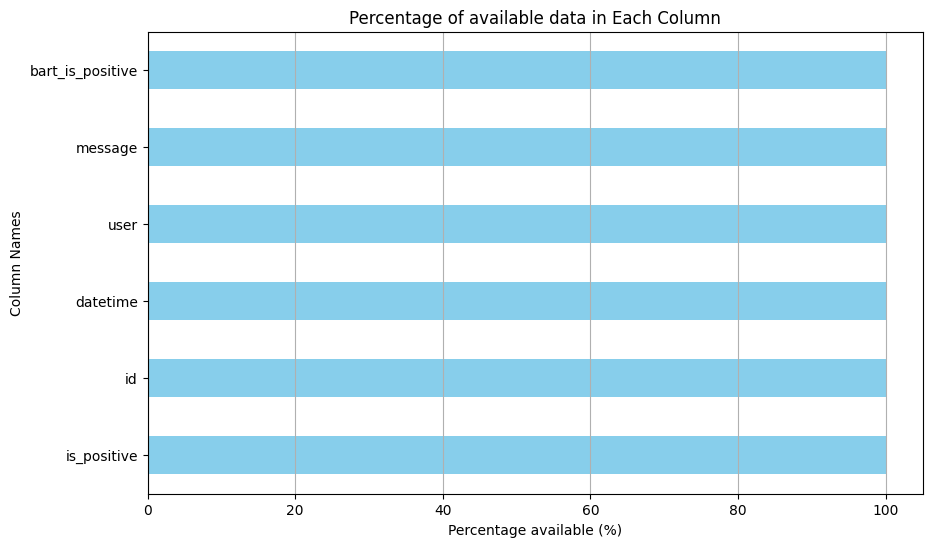

In [7]:
# Check if there is missing data and visualise it as a plot 
import matplotlib.pyplot as plt
available_data = 100 - (df.isnull().mean() * 100).round(2)

# Create a bar plot
plt.figure(figsize=(10, 6))
available_data.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of available data in Each Column')
plt.xlabel('Percentage available (%)')
plt.ylabel('Column Names')
plt.grid(axis='x')
plt.show()

In [8]:
# checking if all users are unique
print(df['user'].unique)

<bound method Series.unique of 0         DEWGetMeTho77
1               Young_J
2         dougnawoschik
3              thireven
4        taracollins086
              ...      
19995            _Jaska
19996      julianicolao
19997        ElaineToni
19998       lindseyrd20
19999       serraannisa
Name: user, Length: 20000, dtype: object>


# Model training - RandomForest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# apply vectroizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)  

# Test split
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, random_state=42, test_size=0.3)

# train RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train_vec, y_train)
y_pred_rf = rnd_clf.predict(X_train_vec)

print("Vocabulary: ", vectorizer.vocabulary_)


Vocabulary:  {'nkluvr4eva': 18981, 'poor': 20889, 'little': 15913, 'dumpling': 8495, 'holmdel': 12333, 'vids': 28446, 'really': 21974, 'trying': 27527, 'hope': 12431, 'dont': 8177, 'try': 27524, 'hard': 11766, 'tonight': 27141, 'xx': 29696, 'bed': 3266, 'gotta': 11204, 'wake': 28662, 'hella': 12040, 'early': 8586, 'tomorrow': 27111, 'morning': 17992, 'havent': 11849, 'able': 1190, 'listen': 15894, 'speakers': 24929, 'busted': 4656, 'remembers': 22244, 'solving': 24719, 'relatively': 22193, 'big': 3537, 'equation': 9103, 'unknowns': 28038, 'total': 27231, 'pain': 19863, 'butt': 4666, 'ate': 2593, 'feel': 9743, 'sick': 24151, 'tried': 27442, 'purchase': 21480, 'parked': 19983, 'domain': 8133, 'godaddy': 11081, '70': 858, 'drain': 8301, 'kind': 14843, 'like': 15760, 'gambling': 10640, 'lunch': 16368, 'dj': 8002, 'come': 6119, 'eat': 8618, 'just': 14351, 'got': 11198, 'va': 28202, 'tech': 26257, 'equine': 9106, 'medical': 17174, 'center': 5232, 'lilly': 15780, 'stall': 25185, 'rest': 22384

In [37]:
# Number of features (size of the vocabulary)
len(vectorizer.vocabulary_)

30258

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy = accuracy_score(y_train, y_pred_rf)
precision = precision_score(y_train, y_pred_rf)
recall = recall_score(y_train, y_pred_rf)
f1 = f1_score(y_train, y_pred_rf)
conf_matrix = confusion_matrix(y_train, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9990
Precision: 0.9994
Recall: 0.9986
F1 Score: 0.9990
Confusion Matrix:
[[6984    4]
 [  10 7002]]


RandomForestClassifier perfromed very well with very few misclassifications with 4 False positive and 10 false negatives. 

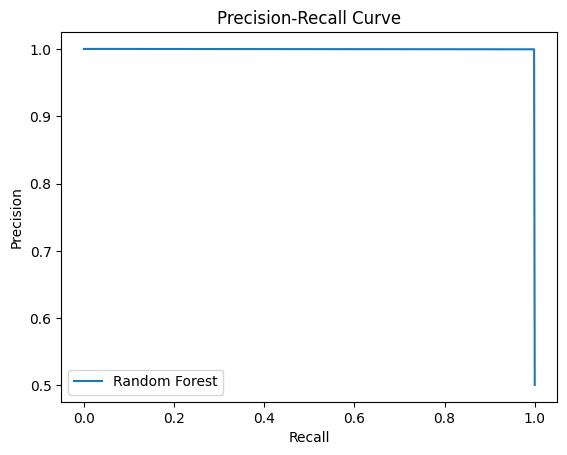

In [39]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_train, y_pred_rf)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



Testing the model on the test set. 

In [40]:
y_pred_test = rnd_clf.predict(X_test_vec)  

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print metrics
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"Precision on Test Set: {precision_test:.4f}")
print(f"Recall on Test Set: {recall_test:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")
print("Confusion Matrix on Test Set:")
print(conf_matrix_test)


Accuracy on Test Set: 0.7152
Precision on Test Set: 0.7308
Recall on Test Set: 0.6950
F1 Score on Test Set: 0.7124
Confusion Matrix on Test Set:
[[2174  780]
 [ 929 2117]]


Didn't perfrom that well in the test set. In the next step I want to find a better combination of hyperparameters. 

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 251),  # Randomly sample from 100 to 250
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),  # Randomly sample from 2 to 10
    'min_samples_leaf': randint(1, 5)  # Randomly sample from 1 to 4
}

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rnd_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_vec, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model_random = random_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 207}


In [54]:
rnd_clf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=3, min_samples_split = 4, n_estimators=207, random_state=42)
rnd_clf2.fit(X_train_vec, y_train)
y_pred_rf2 = rnd_clf2.predict(X_train_vec)

In [55]:
y_pred_test = rnd_clf2.predict(X_test_vec)

accuracy_rf_test = accuracy_score(y_test, y_pred_test)
precision_rf_test = precision_score(y_test, y_pred_test)
recall_rf_test = recall_score(y_test, y_pred_test)
f1_rf_test = f1_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print metrics
print(f"Accuracy on Test Set: {accuracy_rf_test:.4f}")
print(f"Precision on Test Set: {precision_rf_test:.4f}")
print(f"Recall on Test Set: {recall_rf_test:.4f}")
print(f"F1 Score on Test Set: {f1_rf_test:.4f}")
print("Confusion Matrix on Test Set:")
print(conf_matrix_test)

Accuracy on Test Set: 0.7237
Precision on Test Set: 0.7097
Recall on Test Set: 0.7712
F1 Score on Test Set: 0.7391
Confusion Matrix on Test Set:
[[1993  961]
 [ 697 2349]]


Trying an esamble model with logistic regression 

In [44]:
from sklearn.linear_model import LogisticRegression
# Initialize and train a logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_train_vec)

# Evaluate the model
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)


# Print metrics
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"Precision on Test Set: {precision_test:.4f}")
print(f"Recall on Test Set: {recall_test:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")
print("Confusion Matrix on Test Set:")
print(conf_matrix)

Accuracy on Test Set: 0.7152
Precision on Test Set: 0.7308
Recall on Test Set: 0.6950
F1 Score on Test Set: 0.7124
Confusion Matrix on Test Set:
[[6498  490]
 [ 468 6544]]


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create a grid search instance and fit it to the data 
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_lr_model.predict(X_train_vec)

precision_lr_best = precision_score(y_train, y_pred_best)
recall_lr_best = recall_score(y_train, y_pred_best)
accuracy_lr_best = accuracy_score(y_train, y_pred_best)
f1_lr_best = f1_score(y_train, y_pred_best)
conf_matrix_lr_best = confusion_matrix(y_train, y_pred_best)

print(f"Accuracy on Training Set (Best Model): {accuracy_lr_best:.4f}")
print(f"Precision on Training Set (Best Model): {precision_lr_best:.4f}")
print(f"Recall on Training Set (Best Model): {recall_lr_best:.4f}")
print(f"F1 Score on Training Set (Best Model): {f1_lr_best:.4f}")
print("Confusion Matrix on Training Set (Best Model):")
print(conf_matrix_lr_best)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy on Training Set (Best Model): 0.9316
Precision on Training Set (Best Model): 0.9303
Recall on Training Set (Best Model): 0.9333
F1 Score on Training Set (Best Model): 0.9318
Confusion Matrix on Training Set (Best Model):
[[6498  490]
 [ 468 6544]]


In [46]:
# Test improved LogisticRegression on the test set 
y_pred_test_best = best_lr_model.predict(X_test_vec)

# Evaluate the best model on the test set
precision_lr_best = precision_score(y_test, y_pred_test_best)
recall_lr_best = recall_score(y_test, y_pred_test_best)
accuracy_lr_best = accuracy_score(y_test, y_pred_test_best)
f1_lr_best = f1_score(y_test, y_pred_test_best)
conf_matrix_lr_best = confusion_matrix(y_test, y_pred_test_best)

print(f"Accuracy on Test Set (Best Model): {accuracy_lr_best:.4f}")
print(f"Precision on Test Set (Best Model): {precision_lr_best:.4f}")
print(f"Recall on Test Set (Best Model): {recall_lr_best:.4f}")
print(f"F1 Score on Test Set (Best Model): {f1_lr_best:.4f}")
print("Confusion Matrix on Test Set (Best Model):")
print(conf_matrix_lr_best)


Accuracy on Test Set (Best Model): 0.7223
Precision on Test Set (Best Model): 0.7204
Recall on Test Set (Best Model): 0.7403
F1 Score on Test Set (Best Model): 0.7302
Confusion Matrix on Test Set (Best Model):
[[2079  875]
 [ 791 2255]]


# Ensemble model with optmized logistic regression and random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Initialize logistic regression and random forest models
lr_model = LogisticRegression( C=1, penalty='l2', random_state=42)
rnd_clf2 # improved random forest model

# Initialize a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rnd_clf2),
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

voting_clf.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7250
Precision: 0.7486
Recall: 0.6901
F1 Score: 0.7181
Confusion Matrix:
[[2248  706]
 [ 944 2102]]


# BART model evaluation and comparison

In [48]:
filtered_rows = df[(df['is_positive'] == 1) & (df['bart_is_positive'] < 0.5)] # checking if there are instances where bart prediction is less than 0.5 and the true label is 1
filtered_rows.head()


,is_positive,id,datetime,user,message,bart_is_positive,bart_binary_predictions
10,1,2052206835,Fri Jun 05 23:59:27 PDT 2009,salmafan,@PerezHilton Zach makes me pee sitting down! A...,0.001972,0
11,1,1992273171,Mon Jun 01 08:29:05 PDT 2009,spanishman,to sum up my day in one word ......... kackered!,0.000913,0
16,1,2190762188,Tue Jun 16 03:39:22 PDT 2009,biaromerok,"i'm feeling quite sleepy today, wish i could s...",0.174804,0
21,1,2054208245,Sat Jun 06 06:49:41 PDT 2009,MTVnHollyWEST23,Whaddup Whaddup Whaddup Whaddup Whaddup I Got...,0.003885,0
23,1,2191233426,Tue Jun 16 04:49:51 PDT 2009,Kate_BridgeMin,Working on photos from Hillsong's 1 year celeb...,0.430485,0


In [49]:
# convert BART predictions to binary. Since the predictions are between 0 and 1 I assume that all values above 0.5 count as positive(1)
# and all values below count as negative (0) and then I use this new binary prediction for comparison
# with true labels (is_positive)
threshold = 0.5
df['bart_binary_predictions'] = (df['bart_is_positive'] >= threshold).astype(int)
df.head(10)

,is_positive,id,datetime,user,message,bart_is_positive,bart_binary_predictions
0,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...,0.005163,0
1,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,Young_J,I'm off too bed. I gotta wake up hella early t...,0.339430,0
2,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,dougnawoschik,I havent been able to listen to it yet My spe...,0.065703,0
3,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,thireven,now remembers why solving a relatively big equ...,0.004046,0
4,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,taracollins086,"Ate too much, feel sick",0.000581,0
5,0,2052381070,Sat Jun 06 00:32:23 PDT 2009,Portablemonkey,Tried to purchase a parked domain through GoDa...,0.001116,0
6,1,1983449090,Sun May 31 13:10:36 PDT 2009,jessig06,on lunch....dj should come eat with me,0.657557,1
7,0,2245480599,Fri Jun 19 16:11:34 PDT 2009,Aligrl,Just got back from VA Tech Equine Medical Cent...,0.017802,0
8,0,1770706008,Mon May 11 22:01:35 PDT 2009,leyyyy,can't log in to my other twitter account. supe...,0.001638,0
9,1,2050057894,Fri Jun 05 17:59:34 PDT 2009,AmiAhuja,@TamaraSchilling Adventure - That's what we al...,0.897199,1


In [53]:
true_labels = df['is_positive']
bart_binary_predictions = df['bart_binary_predictions']

# calculate performance metrics
accuracy_bert = accuracy_score(true_labels, bart_binary_predictions)
precision_bert = precision_score(true_labels, bart_binary_predictions)
recall_bert = recall_score(true_labels, bart_binary_predictions)
f1_bert = f1_score(true_labels, bart_binary_predictions)
conf_matrix_bert = confusion_matrix(true_labels, bart_binary_predictions)

print(f"Accuracy for BART Predictions: {accuracy_bert:.4f}")
print(f"Precision for BART Predictions: {precision_bert:.4f}")
print(f"Recall for BART Predictions: {recall_bert:.4f}")
print(f"F1 Score for BART Predictions: {f1_bert:.4f}")
print("Confusion Matrix for BART Predictions:")
print(conf_matrix_bert)


Accuracy for BART Predictions: 0.7101
Precision for BART Predictions: 0.8486
Recall for BART Predictions: 0.5155
F1 Score for BART Predictions: 0.6414
Confusion Matrix for BART Predictions:
[[9017  925]
 [4873 5185]]


In [56]:
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'BART': [accuracy_bert, precision_bert, recall_bert, f1_bert],
    'Logistic Regression': [accuracy_lr_best, precision_lr_best, recall_lr_best, f1_lr_best],
    'Random Forest': [accuracy_rf_test, precision_rf_test, recall_rf_test, f1_rf_test]
}

print(f"Accuracy on Test Set: {accuracy_rf_test:.4f}")
print(f"Precision on Test Set: {precision_rf_test:.4f}")
print(f"Recall on Test Set: {recall_rf_test:.4f}")
print(f"F1 Score on Test Set: {f1_rf_test:.4f}")
# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(data)
comparison_df.head()


Accuracy on Test Set: 0.7237
Precision on Test Set: 0.7097
Recall on Test Set: 0.7712
F1 Score on Test Set: 0.7391


,Metric,BART,Logistic Regression,Random Forest
0,Accuracy,0.710100,0.722333,0.723667
1,Precision,0.848609,0.720447,0.709668
2,Recall,0.515510,0.740315,0.771175
3,F1 Score,0.641390,0.730246,0.739144


# Comparison between precision-recall curves 

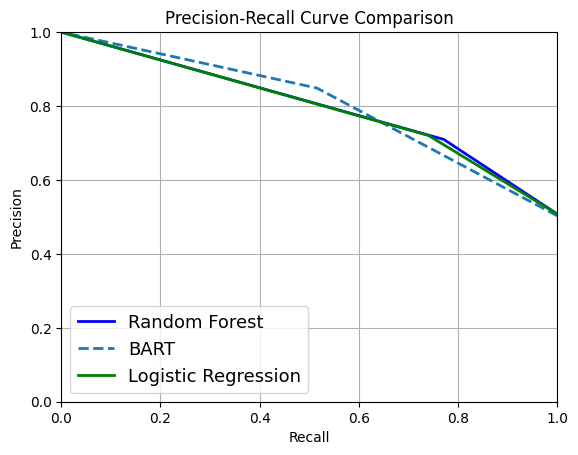

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have the relevant precision and recall values for each model
precisions_bart, recalls_bart, _ = precision_recall_curve(true_labels, bart_binary_predictions)
precisions_rf, recalls_rf, _ = precision_recall_curve(y_test, y_pred_test)
precisions_lr, recalls_lr, _ = precision_recall_curve(y_test, y_pred_test_best)

# Plotting the precision-recall curves
plt.plot(recalls_rf, precisions_rf, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls_bart, precisions_bart, "--", linewidth=2, label="BART")
plt.plot(recalls_lr, precisions_lr, "g-", linewidth=2, label="Logistic Regression")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower left", fontsize=13)
plt.title('Precision-Recall Curve Comparison')
plt.show()


Fine-tuned RandomForest and LogisticRegression performed only slightly better compared to BART. 